# Homework 1
#### Nolan Corcoran - ndc466 
#### Chris Bi - tb25947
#### Jae Yong - jcy325


## 2. Maximum Likelihood Estimation

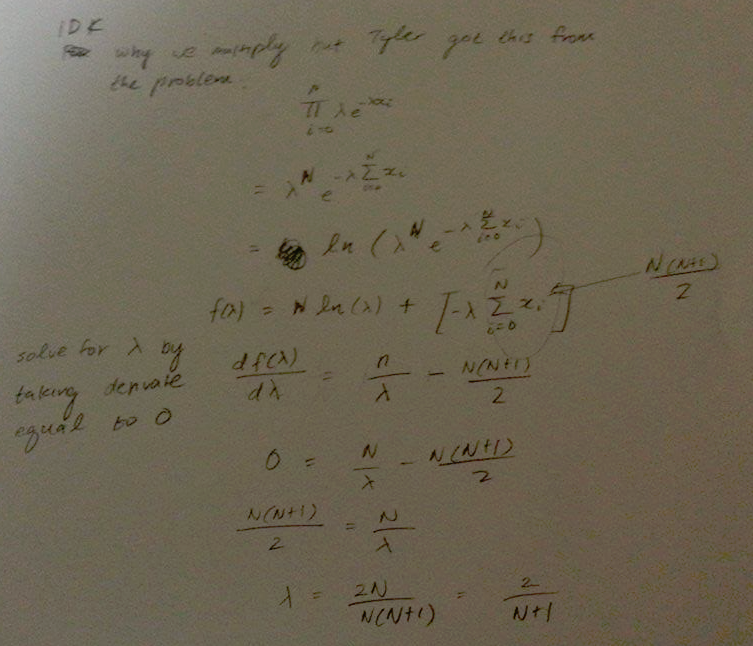

In [50]:
from IPython.display import Image
Image("2.png")

#### All Imports for Problems 3 - 5

In [51]:
import numpy as np
import pandas as pd
from __future__ import division
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

## 3. Bivariate Visualization and Mathematical Form

In [52]:
np.random.seed(10)
sns.set(color_codes=True)

### (a) Obtain contour plots for each of the two distributions using Python

In [53]:
def contour_plot(xvar, yvar, cc):
    xsd, ysd = np.sqrt(xvar), np.sqrt(yvar)
    mean = [0, 0]
    cov = [(xvar, cc*xsd*ysd), (cc*xsd*ysd, yvar)]
    x, y = np.random.multivariate_normal(mean, cov, size=50).T
    sns.kdeplot(x, y, shade=True)

##### i) σx^2 =4; σy^2 =9; ρ=0

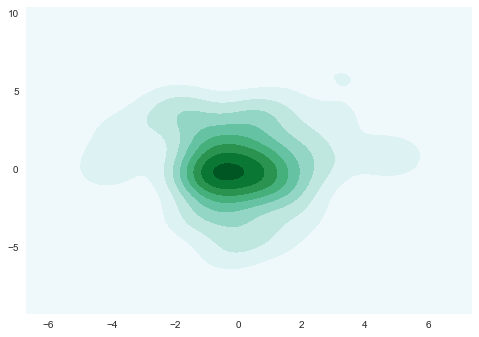

In [54]:
contour_plot(4, 9, 0)

##### ii) σx^2 = 4; σy^2 = 9; ρ = 0.5

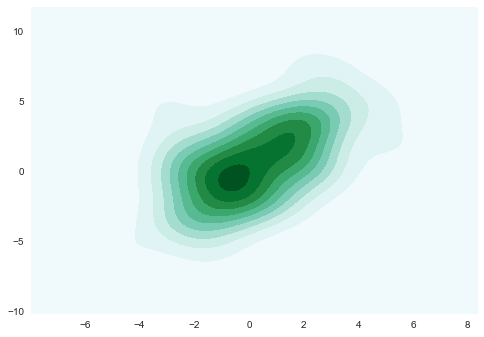

In [55]:
contour_plot(4, 9, 0.5)

### (b) View 3-D plots for the two distributions from at least two different viewing perspectives each

In [56]:
def plot3d(xvar, yvar, cc):
    xsd, ysd = np.sqrt(xvar), np.sqrt(yvar)
    mean = [0, 0]
    cov = [(xvar, cc*xsd*ysd), (cc*xsd*ysd, yvar)]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y = np.mgrid[-8:8:0.8, -8:8:0.8]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mean, cov)   
    #    plt.title
    ax.plot_surface(x, y, rv.pdf(pos), rstride=1, cstride=1, cmap = cm.gray_r, alpha=0.9, linewidth=1)
    for angle in range(0, 360):
        ax.view_init(60, angle)
        plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y = np.mgrid[-8:8:0.8, -8:8:0.8]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mean, cov)   
    #    plt.title
    ax.plot_surface(x, y, rv.pdf(pos), rstride=1, cstride=1, cmap = cm.gray_r, alpha=0.9, linewidth=1)
    for angle in range(0, 360):
        ax.view_init(30, angle)
        plt.show()

##### i) σx^2 =4; σy^2 =9; ρ=0

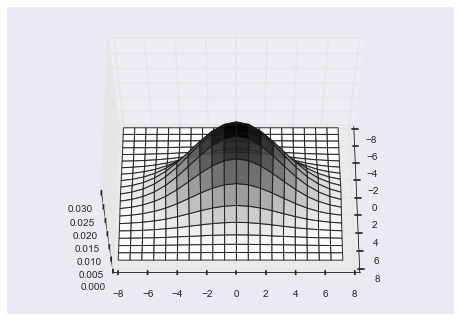

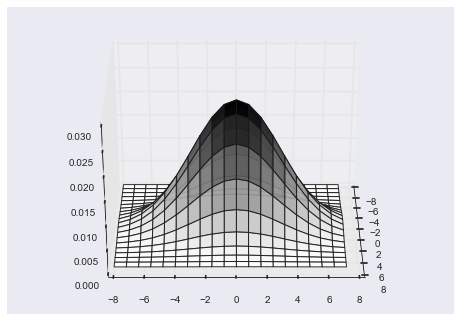

In [57]:
plot3d(4, 9, 0)

##### ii) σx^2 = 4; σy^2 = 9; ρ = 0.5

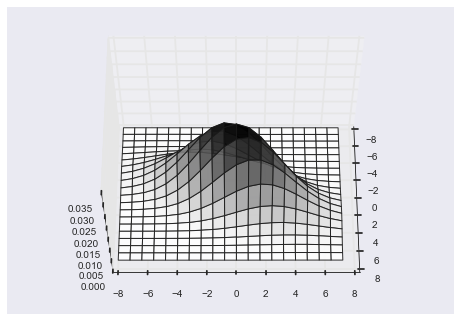

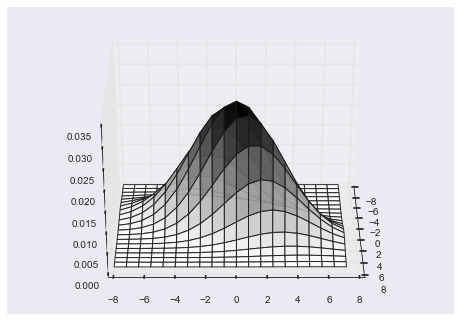

In [58]:
plot3d(4, 9, 0.5)

### (c) Conditional distribution given x=1 and conditional distribution given y=1

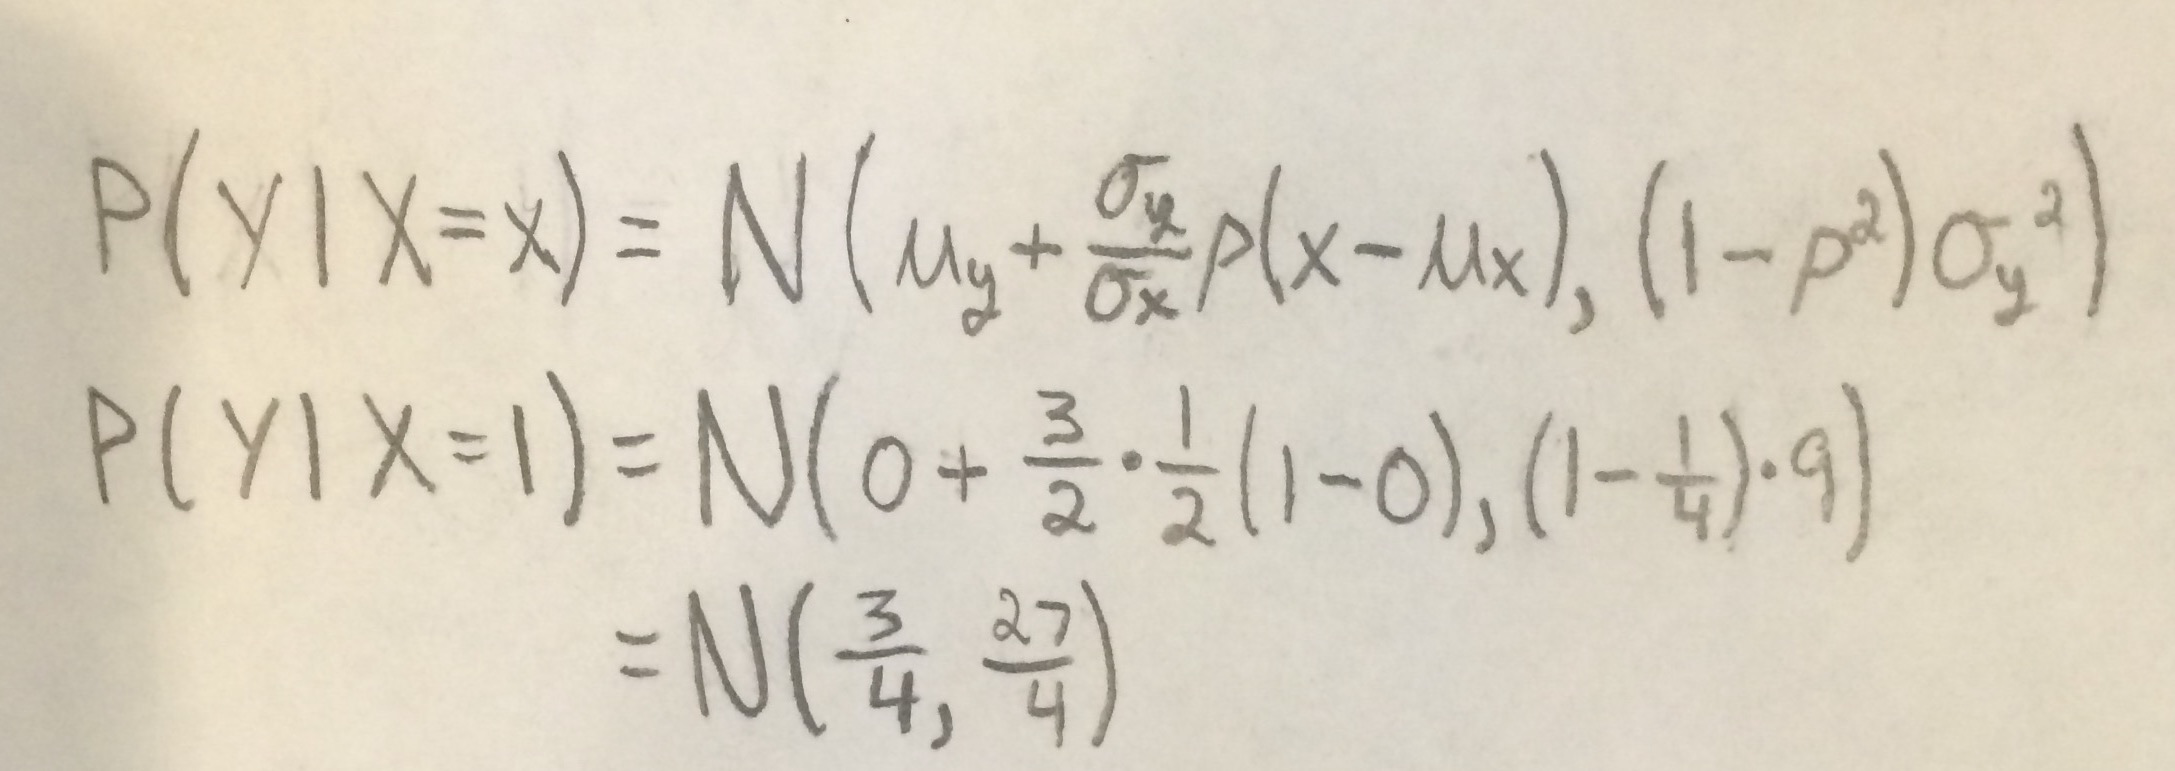

In [59]:
from IPython.display import Image
Image("3c1.png")

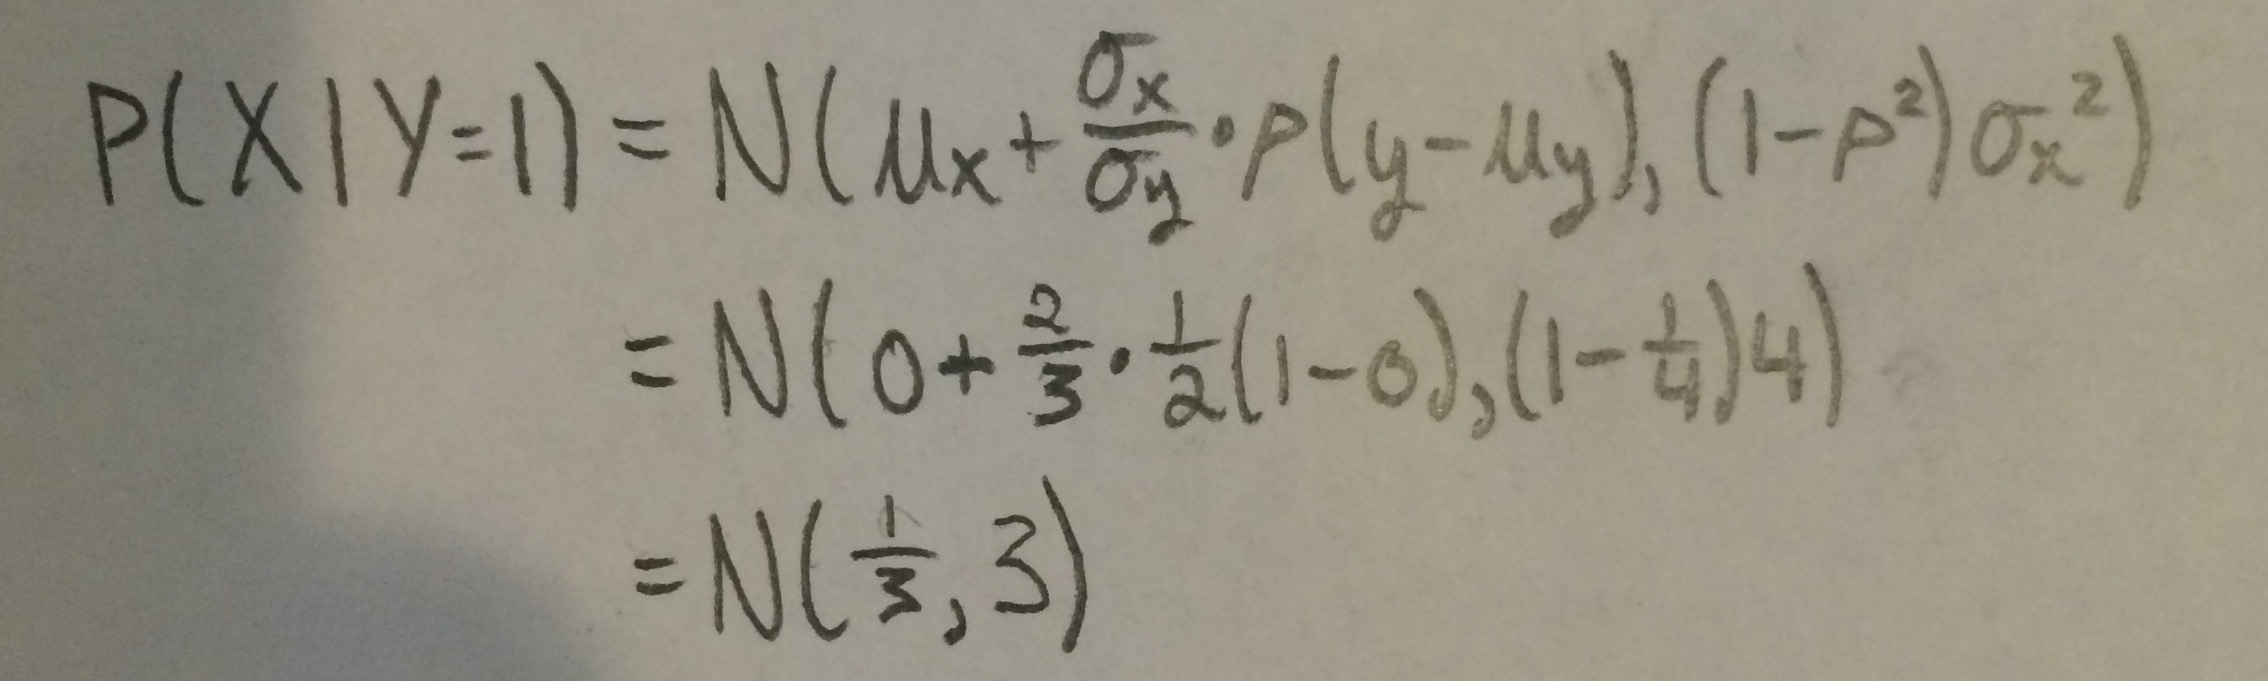

In [60]:
from IPython.display import Image
Image("3c2.png")

## 4. Exploratory Data Analysis using Python

In [61]:
sd = pd.read_csv("data/studentdata.csv", sep=' ', quoting=1)
sd.head()

Student  Height  Gender  Shoes  Number  Dvds  ToSleep  WakeUp  Haircut  \
1        1      67  female     10       5    10     -2.5     5.5       60   
2        2      64  female     20       7     5      1.5     8.0        0   
3        3      61  female     12       2     6     -1.5     7.5       48   
4        4      61  female      3       6    40      2.0     8.5       10   
5        5      70    male      4       5     6      0.0     9.0       15   

    Job  Drink  
1  30.0  water  
2  20.0    pop  
3   0.0   milk  
4   0.0  water  
5  17.5    pop

### (a) Construct a histogram of the variable Shoes.

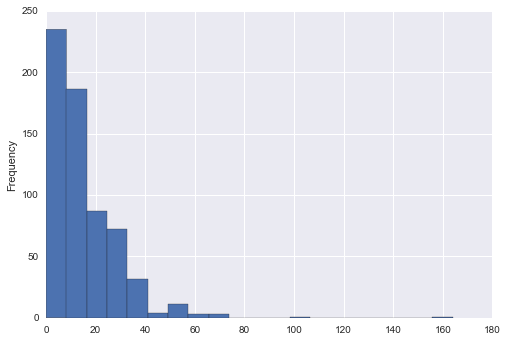

In [62]:
sd['Shoes'].plot.hist(bins=20)

### (b) Use data visualization to check if the variable Dvds (approximately) follows a log-normal distribution.

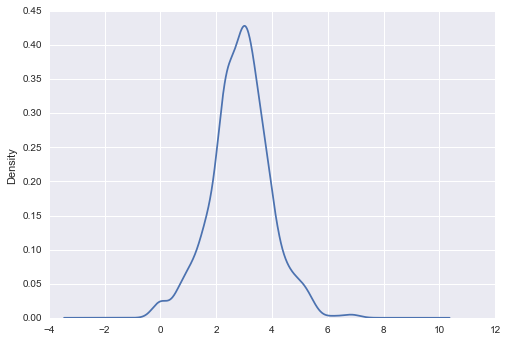

In [63]:
np.log(sd['Dvds'][sd['Dvds']>0]).plot.density()

### (c) Summarize the variable Haircut using the Panda’s describe command. Also, report the 2.5th and 97.5th percentiles.

In [64]:
sd['Haircut'].describe(percentiles=[0.025,.25,.5,.75,.975])

count    637.000000
mean      25.912669
std       27.465040
min        0.000000
2.5%       0.000000
25%       10.000000
50%       16.000000
75%       30.000000
97.5%    100.900000
max      180.000000
Name: Haircut, dtype: float64

### (d) Construct a barplot of the individual values of Drink that were observed.

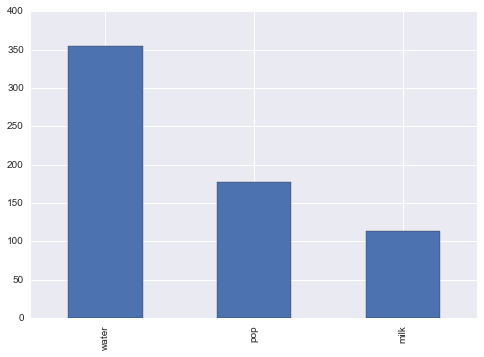

In [65]:
drink=sd['Drink']
drink.value_counts().plot.bar()

### Also, highlight the distribution of the variable Drink between the two genders on the same barplot.

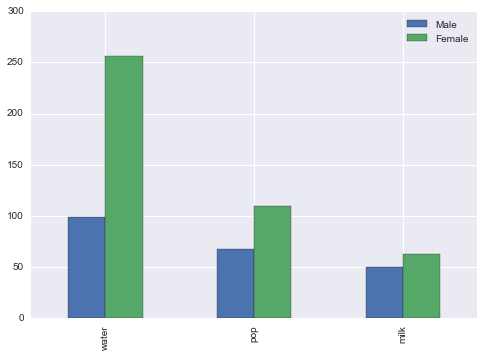

In [66]:
drink_by_gender=pd.concat([sd[sd['Gender']=='male']['Drink'].value_counts(),
                           sd[sd['Gender']=='female']['Drink'].value_counts()]
                           , axis=1)
drink_by_gender.columns=['Male','Female']
drink_by_gender.plot.bar()

### (e) Construct a scatter plot of the variables ToSleep and WakeUp.

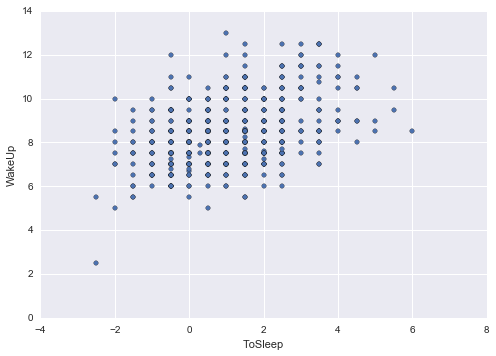

In [67]:
sd.plot.scatter(x='ToSleep', y='WakeUp')

### Do you observe a positive correlation between the two variables?

There indeed appears to be a positive correlation between the two variables.

## 5. Regression with scikit-learn

### (a) Fit a simple linear regression of medv on lstat. What is the coefficient on lstat and what is its interpretation?

In [68]:
# loading housing data set
house_info = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", delim_whitespace = True, header = None, 
                           names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                           'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

medv = house_info["MEDV"].values.reshape(-1, 1)
lstat = house_info["LSTAT"].values.reshape(-1, 1)

# instatiate linear regression model. train linear regression model
lin_reg_model = linear_model.LinearRegression()
lin_reg_model.fit(lstat, medv)
print(lin_reg_model.coef_)

[[-0.95004935]]


The coefficient (beta) on LSTAT is -0.95. Since this value is close to -1, one could argue that between LSTAT and MEDV there could exist a sign inverse relationship.

### (b) Plot medv and and lstat in a scatter plot with the regression line. Comment on the fit.

<function seaborn.utils.despine>

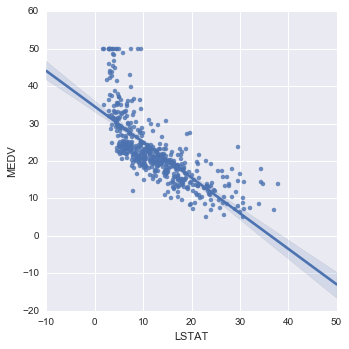

In [69]:
sns.lmplot("LSTAT", "MEDV", house_info)
sns.despine

The linear regression model seems to fit the two fields MEDV and LSTAT. As we can see from the scatterplot that there may be a linear relationship. Taking into account the samples for 0 < LSTAT < 10 the plot seems to curve upward possibly indicating that there may actually be more of a nonlinear (quadratic maybe?) relationship between the two housing elements.

### (c) Muliple linear regression / residual sum of squares

In [70]:
indep_vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dep_vars = ['MEDV']

indep_data = house_info[indep_vars]
dep_data = house_info[dep_vars]

# split the data, train the model, predict with test cases
X_train, X_test, Y_train, Y_test = train_test_split(indep_data, dep_data, test_size = .33, random_state = 42)

# instatiate linear regression model
lin_reg_model = linear_model.LinearRegression()

# train the model
lin_reg_model.fit(X_train, Y_train)

# predict test data using line regression model
lin_reg_predict = lin_reg_model.predict(X_test)
print("Residual sum of squares: %.2f"
      % np.mean((lin_reg_predict - Y_test) ** 2))

Residual sum of squares: 20.72


### (d) i.

In [71]:
medv = house_info["MEDV"].values
dep_vars = np.log(medv)

indep_vars = ['LSTAT', 'RM', 'CRIM', 'ZN', 'CHAS']
indep_vars = house_info[indep_vars]

# split the data, train the model, predict with test cases
# X_train, Y_train = Bostrain, X_test, Y_test = Bostest

X_train = indep_vars[:350]
X_test = indep_vars[350:]
Y_train = dep_vars[:350]
Y_test = dep_vars[350:]

# instatiate linear regression model
lin_reg_model = linear_model.LinearRegression()

lin_reg_model.fit(X_train, Y_train)
Bostrain_predict = lin_reg_model.predict(X_train)
Bostest_predict = lin_reg_model.predict(X_test)

print("Residual sum of squares for Bostrain: %.2f"
      % np.mean((Bostrain_predict - Y_train) ** 2))

print("Residual sum of squares for Bostest: %.2f"
      % np.mean((Bostest_predict - Y_test) ** 2))

Residual sum of squares for Bostrain: 0.02
Residual sum of squares for Bostest: 0.17


### ii.

In [72]:
print('Coefficients: {0}'.format(zip(indep_vars, np.squeeze(lin_reg_model.coef_))))

Coefficients: [('LSTAT', -0.014009810952274056), ('RM', 0.30887981712772999), ('CRIM', -0.006195563839933132), ('ZN', 0.00041253183973814376), ('CHAS', 0.080209389103405221)]


### iii.

In [73]:
# R Square calculation
print(r2_score(Y_test, Bostest_predict))

0.132695984741


Based on our coefficient of determination (R^2) we would say that the MLR model we used is weak in terms of performing predictions on MEDV as the value 0.133 is much lower than the desired theoretical R^2 value of 1.